In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, asc, desc

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(recent_date)
recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')
recent_date = recent_date.date()

2017-08-23


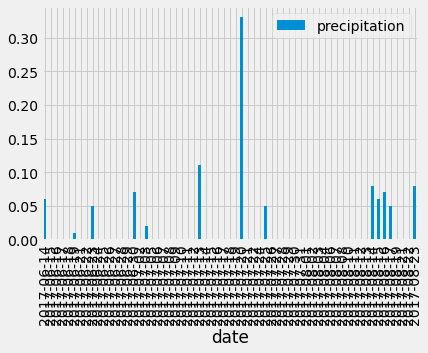

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = recent_date - dt.timedelta(weeks=10)

# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_stations = session.query(Station.station, func.count(Station.station))\
    .group_by(Station.station).order_by(func.count(Station.station).desc()).all()

# List the stations and the counts in descending order.
most_active = active_stations[0][0]

# Perform a query to retrieve the data and precipitation scores
last12 = session.query(Measurement.date, Measurement.prcp)\
    .where(Measurement.date >= last_date, Measurement.station == most_active)\
        .all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(last12, columns=['date','precipitation'])
df_precipitation.set_index('date', inplace=True)
df_precipitation.head()

# Sort the dataframe by date
df_precipitation.sort_index(ascending=False, axis=0)

# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(kind='bar')
plt.xticks()
plt.show()



In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precipitation.describe()

,precipitation
count,45.000000
mean,0.085333
std,0.152965
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,0.560000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(Station.station)).distinct().all()
num_stations

[(9,)]

In [55]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_stations = session.query(Station.station, func.count(Station.station))\
    .group_by(Station.station).order_by(func.count(Station.station).desc()).all()

# List the stations and the counts in descending order.
print(active_stations)

[('USC00519523', 1), ('USC00519397', 1), ('USC00519281', 1), ('USC00518838', 1), ('USC00517948', 1), ('USC00516128', 1), ('USC00514830', 1), ('USC00513117', 1), ('USC00511918', 1)]


In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]

# lowest at USC00519281
lowest = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == most_active).order_by(Measurement.tobs.asc())\
        .first()
print(lowest)

lowest = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active)\
        .first()
print(lowest)

# highest at USC00519281
highest = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == most_active).order_by(sqlalchemy.desc(Measurement.tobs))\
        .first()
print(highest)

# average at USC00519281
average = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
print(average)

('USC00519523', 56.0)
('USC00519523', 56.0)
('USC00519523', 85.0)
[('USC00519523', 74.5436493068565)]


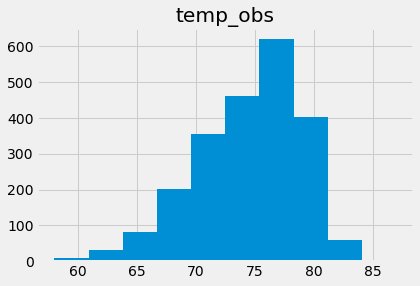

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date = session.query(Measurement.date)\
    .filter(Measurement.station == most_active)\
        .order_by(desc(Measurement.date)).first()[0]
# print(recent_date)
recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')
recent_date = recent_date.date()

# Calculate the date one year from the last date in data set.
last_date = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the temperature data
last12 = session.query(Measurement.date, Measurement.tobs)\
    .where(Measurement.date >= last_date)\
        .all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_temp = pd.DataFrame(last12, columns=['date','temp_obs'])
df_temp.set_index('date', inplace=True)

# Sort the dataframe by date
df_temp.sort_index(ascending=False, axis=0)

df_temp.hist()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()